In [1]:
# %load ./scripts/do_RT_thermal.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
import sys
#sys.path.append('../')
from models import *



p0 = 'default'
outdir = '/out/m1_test/'
pdef = new_model(p0)
m0 = initialize_model(pdef,outdir=outdir)
#save_setup_fig(m0)

#prep_thermal_transfer(m0,nphot=100000)
print('ready to do thermal montecarlo!')

#do_thermal_transfer(m0,nt=8)
print('thermal monte carlo done!')

#save_dustRT(m0)

stellar_params: {'Ms': 1, 'Rs': 2.0, 'Ts': 5000, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.06, 'Mfrac': [0.01, 0.01], 'R0': [5, 5], 'Rout': [100, 50], 'H0': [1, 0.3], 'p': [-1, -1], 'fi': [0.25, 0.25], 'Rdisk': [125, 125]}
envelope_params: {'Min': 1e-06, 'Rc': 125, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False}
grid_params: {'N': [180, 90, 48], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': False, 'fLya': 0.0001}
directory exists - will overwrite current model if you write to it!
Reading wavelength_micron.inp
Writing wavelength_micron.inp
Reading wavelength_micron.inp
Writing stars.inp
Reading amr_grid.inp
Reading wavelength_mic

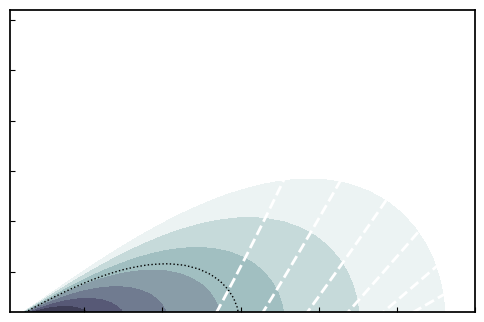

In [126]:
f,ax=subplots(1,dpi=100)
sca(ax)
plot_slice(m1, rho=m1.m.rho_disk(fluid=0),cmap='bone_r',levels=np.linspace(-14.35,-11,10))
plot_contour(m1,rho=m1.m.rho_disk(fluid=0),colors='black',thresh=[-13.35,-10],log=True,linestyles='dotted',linewidths=1)
model = m1.m
for j in np.linspace(np.radians(model.env['theta_min']),pi/2.,8):
    streamline = model.stream(th0=j,shock=False)
    r = streamline['path'][0]
    th = streamline['path'][1]
    l = plot(r*np.sin(th),r*np.cos(th),color='white',lw=2,ls='dashed')

ylim(1,31)
xlim(1,120)

rin_line = np.ones(10)*30
rout_line = np.ones(10)*60
y_line = np.linspace(-10,0,10)
ax.patch.set_alpha(0)
#plot(rin_line,y_line)
#plot(rout_line,y_line)

ax.yaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_major_formatter(NullFormatter())


In [ ]:
sca(ax[1])
semilogy(m1.m.r, m1.m.sig_profile(m1.m.r),lw=2,color='black')
xlim(1,120)
axvline(m1.m.env['Rc'],color='gray',lw=1,ls='dashed')
ylim(0.1,1700)

In [1]:
# %load ./scripts/do_RT_he.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
import sys
sys.path.append('../')
from models import *

outdir = './out/m1_test/'
m0 = load_model(outdir)

prep_he_transfer(m0)
print('ready to do high energy radiation montecarlo!')

do_he_transfer(m0,nt=8)
print('high energy monte carlo done!')

save_heRT(m0)

In [2]:
# %load ./scripts/do_RT_he.py
from pylab import *
import radmc3dPy as rpy
import numpy as np
import os
from scipy import interpolate
#import sys
#sys.path.append('../')
from models import *

outdir = './out/m1_test/'
m0 = load_model(outdir)

stellar_params: {'Ms': 1, 'Rs': 2.0, 'Ts': 5000, 'accrate': 1e-07, 'f': 0.01}
disk_params: {'Mdisk': 0.06, 'Mfrac': [0.01, 0.01], 'R0': [5, 5], 'Rout': [100, 50], 'H0': [1, 0.3], 'p': [-1, -1], 'fi': [0.25, 0.25], 'Rdisk': [125, 125]}
envelope_params: {'Min': 1e-06, 'Rc': 125, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False}
grid_params: {'N': [180, 90, 48], 'min': [0.1, 0.19634954084936207, 0], 'max': [400, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'LX': 1e+30, 'G0': 1, 'viscous_heating': False}
directory exists - will overwrite current model if you write to it!
Loading from model directory:/Users/aleksandra/Desktop/wedgeford/./out/m1_test/
Reading amr_grid.inp
Reading wavelength_micron.inp


In [3]:
from models.prepchem import *

In [4]:
write_out(m0)

Reading dust_density.inp
Reading dust_temperature.dat


'model.out'

### Make your new grid for the chemistry

In [184]:
from scipy.ndimage import gaussian_filter
class chemdisk:
    def __init__(self,output,chemdir = '/test1/'):
        self.input = output
        self.chemdir = self.input.m.parent_dir + 'chemistry/environ' + chemdir
        self.rundir = self.input.m.parent_dir + 'chemistry/runs' + chemdir
        if os.getcwd() != self.input.m.outdir:
            os.chdir(self.input.m.outdir)
        if output.rho == {}:
            output.rho2D()
        if output.T == {}:
            output.T2D()
        if 'gas' not in output.T.keys():
            calc_gas_T(output)
        self.data = {}
        
        try:
            os.mkdir(self.chemdir)
        except:
            print('environ directory exists - will overwrite current model if you write to it!')
        
        try:
            os.mkdir(self.rundir)
        except:
            print('run directory exists!')
    
    def regrid_disk(self):
        model = self.input.m
        rho_g = self.input.rho['gas']
        rho_d1 = self.input.rho['dust1'] 
        rho_d2 = self.input.rho['dust2']
        T_d = self.input.T['dust']
        T_g = self.input.T['gas'].T
        rhod1_2d = make_quadrant(model,rho_d1, fill_value = model.env['rho_amb']*model.env['d2g'],order='F',smooth=False).T
        rhod2_2d = make_quadrant(model,rho_d2, fill_value = 0,order='F',smooth=False).T
        rhog_2d = make_quadrant(model,rho_g, fill_value = model.env['rho_amb'], order='F',smooth=False).T
        r,z = self.make_rz_H()
        #temperature gets smoothed before it goes in there as noise from radmc can make interpolation wonky
        Td_2d = make_quadrant(model,T_d,fill_value = 0,order='F')
        #fill in the bits outside the model quadrant with an ambient temperature from the model
        T_amb = model.T(np.sqrt(r**2 + z**2))
        Td_2d[Td_2d < 1] = T_amb[Td_2d < 1]
        Td_2d = Td_2d.T
        
        Tg_2d = make_quadrant(model,T_g,fill_value = 0,order='F')
        #fill in the bits outside the model quadrant with an ambient temperature from the model
        Tg_2d[Tg_2d < 1] = T_amb[Tg_2d < 1]
        Tg_2d = Tg_2d.T
        return rhog_2d, rhod1_2d, rhod2_2d, Td_2d, Tg_2d 
    
    def fill_data(self):
        rhog_2d, rhod1_2d, rhod2_2d, Td_2d, Tg_2d = self.regrid_disk()
        self.data['Tg'] = Tg_2d.flatten().reshape(np.shape(self.data['r']))
        self.data['rhod1'] = rhod1_2d.flatten().reshape(np.shape(self.data['r']))
        self.data['rhod2'] = rhod2_2d.flatten().reshape(np.shape(self.data['r']))
        
         
    def make_rz_H(self): #make a logarithmically spaced cylindrical grid
        model = self.input.m
        zmin = 1e-10
        new_r = np.logspace(np.log10(model.grid['min'][0]), np.log10(model.grid['max'][0]), model.grid['N'][0])
        zf_norm = np.append(zmin, np.logspace(-4,0,50)) #faces of the z-cells
        zc_norm = 0.5*(zf_norm[1:] + zf_norm[:-1]) #50 points in the Z direction
        R,Z = np.meshgrid(new_r,zc_norm)
        Z *= R/np.tan(np.radians(model.env['theta_min']))
        return R,Z
    
    def make_quadrant(self,quantity_2d,fill_value=0,order='F',smooth=True): # to be used with the radmc 3d values
        model = self.input.m
        r_cyl,z_cyl = model.make_rz()
        r_new, z_new = self.make_rz_H()
        if smooth == True:
            quantity_2d = gaussian_filter(quantity_2d, sigma=[1,4])
        quantity_2d_interp = griddata((r_cyl[:,:,0].flatten(),z_cyl[:,:,0].flatten()), quantity_2d.ravel(order=order), (r_new,z_new),fill_value=fill_value,method='linear',rescale=True)
        return quantity_2d_interp
    
    def write_out(self,outname='model',ndust=2):
        model = self.input.m
        if os.getcwd() != model.outdir:
            os.chdir(model.outdir)
        r,z = self.make_rz_H()
        header1 = 'R(AU)    z(AU)   rhogas(g/cm3)  rhodust(g/cm^3)    T(K)   [    4 types of dust]      f_H\n'
        header2 = '-ForChem+Plots--------------------------------------------------------\n'

        rhog_2d, rhod1_2d, rhod2_2d, Td_2d, Tg_2d  = self.regrid_disk()
        rhod_2d = rhod1_2d + rhod2_2d
        with open(self.chemdir + outname+'.out',"w") as outfile:
            outfile.write(header1)
            outfile.write(header2)
            Nr = len(r.flatten())
            for n in np.arange(Nr):
                outfile.write('%10.7f %10.7f   %5.2e   %5.2e %7.1f %12.7f %12.7f %12.7f %12.7f   %7.2e\n'%(r.T.flatten()[n],z.T.flatten()[n],rhog_2d.flatten()[n], rhod_2d.flatten()[n] ,Td_2d.flatten()[n],1.0,0.0,0.0,0.0,1.0))
        return outname + '.out'

    def read_out(self,outname='model.out'): #convenience function for reading the .out file and returning the bits accessible as dictionary
        if os.getcwd() != self.chemdir:
            os.chdir(self.chemdir)
        if os.path.exists(outname) == False:
            self.write_out(outname)
        data = np.loadtxt(outname,skiprows=2,usecols=(0,1,2,3,4))
        r = data[:,0]
        z = data[:,1]
        shape = (len(np.unique(r)),50)
        rhog = data[:,2].reshape(shape)
        rhod = data[:,3].reshape(shape)
        T = data[:,4].reshape(shape)
        self.data = {'r':r.reshape(shape), 'z':z.reshape(shape),'rhog':rhog,'rhod':rhod,'Td':T}
        self.fill_data()

def plot_out(chem_disk,prop='rhog',outname='model.out',log=True,method=contourf,**pk): #plotting convenience function to inspect .out file contents
    if chem_disk.data == {}:
        chem_disk.read_out()
    data = chem_disk.data
    if log == True:
        method(data['r'],data['z'],np.log10(data[prop]),**pk)
    else:
        method(data['r'],data['z'],(data[prop]),**pk)
        
def plot_prechem(chem_disk,rlim=400): #convenience function to plot the dust radiative transfer real quick
    model = chem_disk.input.m
    X,Z = model.make_rz()
    X = X[:,:,0]
    Z = Z[:,:,0]
    f,ax = subplots(2,3,constrained_layout=True)
    f.set_size_inches(6,6)
    
    if os.getcwd() != model.outdir:
        os.chdir(model.outdir)
    if chem_disk.input.rho == {}:
        chem_disk.input.rho2D()
    if chem_disk.input.T == {}:
        chem_disk.input.T2D()
        
    c = ax[0,0].contourf(X, Z, np.log10(chem_disk.input.rho['gas'].T),levels=np.arange(model.rhomin,model.rhomax,1),extend='both')
   
    ax[0,0].set_ylabel('z [au]')
    ax[0,0].set_title(r'Original $\rho_g$',fontsize=11)
    cb = colorbar(c,ax=ax[:,0],location='bottom',aspect=10,ticks=np.array(c.levels[::2]).astype(int))
    cb.set_label(r'$\rho$ [$\mathrm{g/cm^{-3}}$]')
    
    sca(ax[1,0])
    plot_out(chem_disk,prop='rhog',cmap='viridis',levels=np.arange(model.rhomin,model.rhomax,1),log=True,extend='both')
    ax[1,0].set_ylabel('z [au]')
    ax[1,0].set_title(r'Regridded $\rho_g$ ',fontsize=11)
    
    
    c = ax[0,1].contourf(X, Z, np.log10(chem_disk.input.rho['dust1'].T + chem_disk.input.rho['dust2'].T),levels=np.arange(model.rhomin,model.rhomax,1),extend='both')
    ax[0,1].set_title(r'Original $\rho_d$',fontsize=11)
    cb = colorbar(c,ax=ax[:,1],location='bottom',aspect=10,ticks=np.array(c.levels[::2]).astype(int))
    cb.set_label(r'$\rho$ [$\mathrm{g/cm^{-3}}$]')
    
    sca(ax[1,1])
    plot_out(chem_disk,prop='rhod',cmap='viridis',levels=np.arange(model.rhomin,model.rhomax,1),log=True,extend='both')
    ax[1,1].set_title(r'Regridded $\rho_d$',fontsize=11)
    
    
    
    from scipy.ndimage import gaussian_filter
    smooth_T = gaussian_filter(chem_disk.input.T['dust'].T, sigma=[4,1])
    c2 = ax[0,2].contourf(X, Z, smooth_T,levels=np.linspace(5,125,19),cmap='twilight_shifted',extend='both')


    ax[0,2].set_title(r'Original $T_d$',fontsize=11)
    cb2 = colorbar(c2,ax=ax[:,2],location='bottom',ticks=np.array(c2.levels[::3]).astype(int),aspect=10)
    cb2.set_label(r'$T \ \mathrm{[K]}$')
    
    sca(ax[1,2])
    plot_out(chem_disk,prop='Td',cmap='twilight_shifted',levels=np.linspace(5,125,19),log=False,extend='both')
    
    ax[1,0].set_xlabel('r [au]')
    ax[1,1].set_xlabel('r [au]')
    ax[1,2].set_xlabel('r [au]')
    
    ax[1,2].set_title(r'Regridded $T_d$',fontsize=11)
   
    
    for a in ax[0,:]:
        a.set_xlim(0,rlim)
        a.set_ylim(0,rlim)
        a.xaxis.set_major_locator(MultipleLocator(int(rlim/5)))
        a.yaxis.set_major_locator(MultipleLocator(int(rlim/5)))
    
    for a in ax[1,:]:
        a.set_xlim(0,rlim)
        a.set_ylim(0,rlim)
        a.xaxis.set_major_locator(MultipleLocator(int(rlim/5)))
        a.yaxis.set_major_locator(MultipleLocator(int(rlim/5)))
    f.savefig(chem_disk.chemdir+'regrid.pdf')
        

In [267]:
def calc_zeta(self,cr_model=''):
    if self.data == {}:
        self.read_out()
    if cr_model == '':
        cr_model = self.input.m.rad['cr_model']
    def zetaeval(ncol,model=cr_model):
        labels = ['m02','w98','ssm','ssx','ttm','ttx']
        #Rates from Cleeves et al. 2014
        #zeta_powerlaw alpha zeta_exponential Sigma
        allrts = np.array([[6.8e-16,3.7e-18,0.423,210.0],
            [2.0e-17,9.4e-19,0.021,260.0],
            [1.1e-18,3.0e-19,-0.00,260.0],
            [1.6e-19,7.5e-20,-0.01,250.0],
            [7.0e-21,4e-21,-0.01,290.0],
            [1.1e-22,3e-23,-0.02,490.0]])

        modin = labels.index(model)
        zp = allrts[modin,0]
        ze = allrts[modin,1]
        al = allrts[modin,2]
        co = allrts[modin,3]
        mumult = 2.36
        piv = 1e20
        F = zp*ze*mumult/(ze*mumult*(ncol/piv)**al+zp*(np.exp(ncol*2.0*mh/co)-1)) #C13 eq5
        return F
    
    Ncol_external = 1e10 #column before disk surface
    
    rhog = self.data['rhog']
    axis = 1
    rpts = np.unique(self.data['r'])
    zmin = 1e-10
    zc = self.data['z']
    dzz = 0.18741465494412662 #delta z/z for 50 bins 
    dz = zc*dzz*AU #in cm
    rhog_los = np.append(np.flip(rhog,axis=axis),rhog,axis=axis)
    dz_los = np.append(np.flip(dz,axis=axis),dz,axis=axis)
    Ncol_zpos = np.cumsum(rhog_los*dz_los,axis=axis)/(mu*mh) + Ncol_external
    Ncol_zneg = np.cumsum(np.flip(rhog_los*dz_los,axis=axis),axis=axis)/(mu*mh) + Ncol_external
    zeta = 0.5*zetaeval(Ncol_zpos,model=cr_model) + 0.5*zetaeval(Ncol_zneg,model=cr_model)
    self.data['zeta'] = zeta[:,50:]
    self.data['zcm'] = np.flip(np.cumsum(dz_los[:,:50],axis=axis),axis=axis)
    self.data['Nrz'] = np.ones_like(data['z'])*Ncol_external


In [304]:
def calc_dustfrac(self):
    model = self.input.m
    a_chem = 0.1 #microns
    sa_chem = a_chem**2 #factor of 4pi cancels out in ratio
    df0 = (self.data['rhod']/model.dust['rho_si'])*sa_chem #total area/vol
    #amax_ism = model.dust['amax_ism']
    #amin_chem = model.dust['amin_chem']
    ndust = len(self.dust['amin'])
    df = np.zeros_like(df0)
    for d in ndust:
        key = 'rhod'+str(d+1)
        p = model.dust['apow'][d]
        amin = model.dust['amin'][d]
        amax = model.dust['amax'][d]
        sa_tot = 3*((4.-p)/(3.-p))*(amax**(3-p) - amin**(3-p))/(amax**(4-p)-amin**(3-p))
        df += (self.data[key]/model.dust['rho_si'])*sa_tot
    self.data['dustfrac'] = df/df0

In [ ]:
def regrid_radiation(self):
    # write function to interpolate radiation field onto the chemical grid
    pass

def write_uv(self):
    # can take the UV field attenuation at sampled wavelengths and apply to the original
    # flux + ISRF
    # can shove Lya line in there to match continuum (at every point in the grid)
    # should get radmcpy to re-compute the new spectrum at the wavelengths of the o.g. code
    # bin that spectrum at wavelengths sampled by the mcmono computation, with flux at mcmono as f0
    # then compute attenuation factor for each slice of mcmono -- regrid onto chemical grid
    # then write radiation in format for chemical code, running through the original spectrum for each zone in grid
    pass

def write_xray(self):
    # can take the Xray field attenuation at sampled wavelengths and apply to the original spectrum 
    # at every point in the grid
    pass


    


In [338]:
def Lya_line(model, fLya=1e-2):
    lam_nm, flya = np.loadtxt(model.models_dir + 'templates/spec_lya.txt',skiprows=4, unpack=True)
    lam_mu = lam_nm*1e-3 #microns
    nu = c/(lam_mu*1e-4)
    fnu = flya*(h*nu)* (c*1e7) / (nu**2)
    lam_lya = 1.215670000e-1
    #if os.getcwd() != model.outdir:
        #os.chdir(model.outdir)
    os.chdir(model.models_dir + 'templates/')
    grid = rpy.reggrid.radmc3dGrid()
    grid.readWavelengthGrid()
    rad_data = rpy.radsources.radmc3dRadSources(ppar=model.radmcpar,grid=grid)
    rad_data.nstar = 1
    rad_data.getStarSpectrum(grid=grid,ppar=model.radmcpar)
    fnu_s = rad_data.fnustar.squeeze()
    rad_data.getSpotSpectrum(grid=grid,ppar=model.radmcpar)
    fnu_uv = rad_data.fnuspot.squeeze()
    lam_s = rad_data.grid.wav
    nu_s = c/(lam_s*1e-4)
    
    Fstar = np.trapz(fnu_s,x=nu_s) #total stellar flux
    Ftot = np.trapz(fnu,x=nu) #total lyman alpha flux
    norm = (Fstar*fLya)/(Ftot) #scaling so that the total in the lya line is fLya of the stellar flux
    fpeak_lya = np.amax(norm*fnu)
    fnu_lya = interpolate.interp1d(x= nu, y = fnu*norm, fill_value=np.amin(fnu*norm),bounds_error=False)
    
    return fpeak_lya, fnu_lya



Lya_line(m0.m)


Reading wavelength_micron.inp
[0.093      0.121567   0.14242525 0.1632835  0.18414175 0.205     ]


(4.988169145655148e-19,
 <scipy.interpolate.interpolate.interp1d at 0x7fb3c81debd0>)

Reading wavelength_micron.inp
Writing chem_wavelength_micron.inp
Reading chem_wavelength_micron.inp


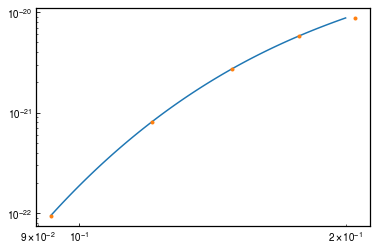

In [303]:
#uv_min = 930#angstrom # every 10 angstroms
#uv_max = 2000 #angstrom

#xray_min = 1 #keV
#xray_max = 20 #every 1 keV

#write_wavelength over prescribed wavebands 
#insert x-ray radiation
#write new stars file
#take that stars file as the new value, bin by the values in mcmono

def bin_input_spectrum(self,field='uv'):
    model = self.input.m
    if field == 'uv':
        lam_chem = np.arange(930,2010,10) #in angstroms
        lam_mu = lam_chem*1e-4 #in microns
        lam_rt = np.linspace(uv_min,uv_max,5)
        dnu_rt = c/(np.gradient(lam_rt)*1e-4)
    if field == 'xray':
        lam_chem = np.arange(1,21,1) #in keV
        lam_mu = (1e4*h*c)/(lam_chem*keV) #in microns
        lam_rt = np.logspace(np.log10(xray_min),np.log10(xray_max),5)
        dnu_rt = c/(np.gradient(dlam_rt)*1e-4)
    write_wavelength(model,lam=lam_mu,fname='chem_wavelength_micron.inp')
    os.chdir(model.outdir)
    grid = rpy.reggrid.radmc3dGrid()
    grid.readWavelengthGrid(fname='chem_wavelength_micron.inp')
    rad_data = rpy.radsources.radmc3dRadSources(ppar=model.radmcpar,grid=grid)
    rad_data.nstar = 1
    rad_data.incl_accretion = True
    rad_data.getStarSpectrum(grid=grid,ppar=model.radmcpar)
    rad_data.getSpotSpectrum(grid=grid,ppar=model.radmcpar)
    
    #lam_ = np.squeeze(rad_data.grid.wav)
    fnu_ = np.squeeze(rad_data.fnustar) + np.squeeze(rad_data.fnuspot)

    if field == 'xray':
        xmodel = acc_onto_star(model,lam_mu)
        fnu_ += xmodel['shock']['F'] + xmodel['cool']['F'] 
    
    spec0 = interpolate.interp1d(x=lam_mu, y=fnu_)
    return spec0
    
    

def regrid_radiation(self,field='uv'):
    model = self.input.m
    if field == 'uv':
        lam_chem = np.arange(930,2010,10) #in angstroms
        lam_mu = lam_chem*1e-4 #in microns
        lam_rt = np.linspace(uv_min,uv_max,5)
        dnu_rt = c/(np.gradient(lam_rt)*1e-4)
    if field == 'xray':
        lam_chem = np.arange(1,21,1) #in keV
        lam_mu = (1e4*h*c)/(lam_chem*keV) #in microns
        lam_rt = np.logspace(np.log10(xray_min),np.log10(xray_max),5)
        dnu_rt = c/(np.gradient(dlam_rt)*1e-4)
    spec0 = bin_input_specturm(self,field=field)
    #put in initial lyman alpha line
    fpeak = Lya_line(model,fLya=model.rad['fLya'])
    lya_lam = 0.1210 #rounded lya wavelength
    fnu_[np.argmin(np.abs(lam_-lya_lam))] += fpeak
    
    
    
    
    

In [282]:
def write_1(self,index):
    header = ['R','rho','Tgas','Tdust','zAU','zcm','Nrz','ZetaCR','DustFrac']
    keys = ['r', 'rhog','Tg','Td','z','zcm','Nrz','zeta','dustfrac']
    vals = [self.data[key][index,:] for key in keys]
    towrite = dict(zip(keys,vals))
    nz = len(towrite['r'])
    name = '.e1.{:.4f}'.format(towrite['r'][0])
    with open(self.chemdir + '1environ.inp' + name, 'w') as f:
        f.write('{:12} {:12} {:12} {:12} {:12} {:12} {:12} {:12} {:12}\n'.format(*header))
        f.write('1\n')
        f.write('{:}\n'.format(nz))
        for j in np.arange(nz):
            row = [towrite[key][-1-j] for key in keys]
            f.write('{:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E} {:11.5E}\n'.format(*row))

def write_environ(self):
    nr = len(np.unique(self.data['r']))
    for i in np.arange(nr):
        write_1(self,i)

    

In [218]:
def contents_to_file(self,file_contents,fileprefix):
    filepath = self.input.m.parent_dir+'chemistry/' + fileprefix + '.inp'
    with open(filepath,'w') as f:
        for line in file_contents:
            f.write(line)

In [250]:
def write_0(self,reactions='herb0308gr',species='herb0308gr',name='.inp', abund0 = 'None'):
    mdir = self.m.outdir.split('/')[-1]
    with open(self.chemdir + '0io' + name, 'w') as f:
        f.write('# input & output files:\n')
        f.write('rspecies_{}.dat \t # file with species\n'.format(species))
        f.write('rreacs_{}.dat \t # file with reactions\n'.format(reactions))
        f.write('uv_photons_{}.dat \t # file with uvfield\n'.format(mdir))
        f.write('xray_photons_{}.dat \t # file with xrfield\n'.format(mdir))
        f.write('None \t # file with ISRF \n') #already in outputs from uv/xray field
        f.write('None \t # Radionuclide Ion Rate\n' ) #build this in later?
        f.write('{} \t # initial 2D abundance file \n') #default is None

def set_2(self,**tkwargs):
    template_path = self.input.m.parent_dir+'chemistry/templates/'
    template_file = template_path + '2times.inp'
    file_contents = []
    with open(template_file, 'r') as f:
        for line in f:
            if line.startswith('#'):
                file_contents.append(line)
            else:
                val = line.split('#')[0].strip()
                comment = line.split('#')[-1].strip()
                if comment.startswith('last') and 'last' in tkwargs.keys():
                    val = '{:9.3E}'.format(tkwargs['last']).replace('E','D')
                if comment.startswith('first') and 'first' in tkwargs.keys():
                    val = '{:9.3E}'.format(tkwargs['first']).replace('E','D')
                if comment.startswith('total') and 'total' in tkwargs.keys():
                    val = str(tkwargs['total'])
                new_line = val + '\t #' + comment
                file_contents.append(new_line)
    return file_contents
        
def set_3(self,name ='', **new_values):
    template_path = self.input.m.parent_dir+'chemistry/templates/'
    template_file = template_path + '3abunds' + name + '.inp'
    file_contents = []
    # updates values from a template file 
    # note: only for the species that appear in the template file, 
    # including those that have been commented out
    with open(template_file, 'r') as f:
        for line in f:
            if line.startswith('#') == True:
                old_species  = line.strip('#').split(' ')[0].strip()
                if old_species in new_values.keys():
                    new_val = '{:9.3E}'.format(new_values[old_species]).replace('E','D')
                    new_line = '{:<11} = {}\n'.format(old_species,new_val)
                else:
                    pass
            else: #this is a line that sets new values
                old_species = line.split(' ')[0].strip()
                if old_species in new_values.keys(): #if resetting, update the value
                    new_val = '{:9.3E}'.format(new_values[old_species]).replace('E','D')
                    new_line = '{:<11} {}\n'.format(old_species,new_val)
                else:
                    new_line = line
                file_contents.append(new_line)
    return file_contents

def set_4(self, **tolkwargs):
    template_path = self.input.m.parent_dir+'chemistry/templates/'
    template_file = template_path + '4toleran.inp'
    file_contents = []
    with open(template_file, 'r') as f:
        for line in f:
            if line.startswith('#'):
                file_contents.append(line)
            else:
                val = line.split('#')[0].strip()
                comment = line.split('#')[-1].strip()
                if comment.startswith('rel') and 'rel' in tolkwargs.keys():
                    val = '{:9.3E}'.format(tolkwargs['rel']).replace('E','D')
                if comment.startswith('abs') and 'abs' in tolkwargs.keys():
                    val = '{:9.3E}'.format(tolkwargs['abs']).replace('E','D')
                new_line = val + '\t #' + comment
                file_contents.append(new_line)
    return file_contents

def set_5(self,**flags):
    template_path = self.input.m.parent_dir+'chemistry/templates/'
    template_file = template_path + '5flags.inp'
    file_contents = []
    with open(template_file, 'r') as f:
        for line in f:
            if line.startswith('#') == True:
                file_contents.append(line)
            else: #this is a line that sets parameters
                param, val = line.split('=')
                param = param.strip()
                if param in flags.keys(): #if resetting, update the value
                    new_line = '{:<15} = {}\n'.format(param,flags[param])
                else:
                    new_line = line
                file_contents.append(new_line)
    return file_contents

def set_6(self,name=''):
    template_path = self.input.m.parent_dir+'chemistry/templates/'
    template_file = template_path + '6grainbe' + name + '.inp'
    file_contents = []
     with open(template_file, 'r') as f:
        for line in f:
            file_contents.append(line)

In [187]:
print(c0.input.m.outdir)

/Users/aleksandra/Desktop/wedgeford/./out/m1_test/


In [185]:
c0 = chemdisk(m0)
c0.write_out()

directory exists - will overwrite current model if you write to it!


'model.out'

In [168]:
c0.read_out()

In [150]:
calc_zeta(c0)

In [169]:
calc_dustfrac(c0)

(0.0, 400.0)

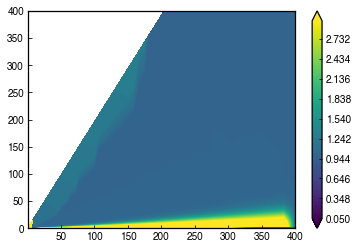

In [172]:
contourf(c0.data['r'],c0.data['z'],c0.data['dustfrac'],extend='both',levels=np.linspace(0.05,3,100))
colorbar()
ylim(0,400)

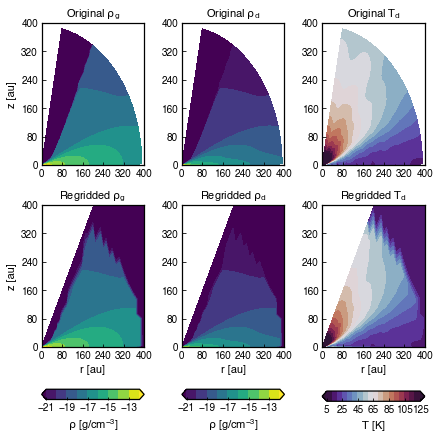

In [45]:
plot_prechem(c0)

In [10]:
if not os.path.exists(outdir):
		os.makedirs(outdir)
zetacr = 1.3e-17
	for n in range(len(r)): #write a new file for each radius?
		#outfile = open(outdir+'1environ.inp.e1.'+np.round(r[n],decimals=4))
		#outfile.write('  R             rho           Tgas          Tdust        zAU           zcm           Nrz           ZetaCR        DustFrac\n')
		#outfile.write('1\n')
		#outfile.write(str(nz)+'\n')
		if n !=0 and r[n] == r[n-1]:
			nsig_unset = -3.0 *rhog[n] * dust2gas/rho_si * (amax_ism**-0.5 - amin_chem**-0.5)/ \
			(amax_ism**-0.5 - amin_chem**-0.5)
			nsig_tot = 0.0
			for d in range(ndust):
				nsig = -3.0 *rhod[d,n]/rho_si * (amax[d]**-0.5 - amin[d]**-0.5)/ \
				(amax[d]**-0.5 - amin[d]**-0.5)
				nsig_tot = nsig_tot + nsig
			dustfrac = nsig_tot/nsig_unset
			zcm = zcm + np.abs(z[n]-z[n-1])
		else:
			zcm = 1e-10
			print("new radius:",r[n],z[n])
            
    #outfile.write(' %6.2E   %6.2E   %6.2E   %6.2E   %6.2E   %6.2E   %6.2E   %6.2E   %6.2E\n'%(r[n],rhod[n],Td[n],Td[n],z[n],zcm,1e10,zetacr,dustfrac))

In [ ]:
isrf_model = 'isrf_'+isrf_vals[i]+'_half_'+env_orig[e]+'.dat'
isrf_model = 'None'
ioname = '0io.'+str(int(float(isrf_vals[i])))+'G0.x'+str(int(float(xr_vals[x])))+'.inp'
#print(diskchem_dir,env_orig[e],uv_model[e],short_env_orig[e])
Tgas_Comp(diskchem_dir,env_orig[e],uv_model[e],short_env_orig[e])
Generate_Environment(diskchem_dir,env_orig[e])
Create_0io(diskchem_dir,env_orig[e],uv_model[e],xr_model,isrf_model,slr_model[e],srt_time[e],rreac,rspec,ioname)